<a href="https://colab.research.google.com/github/brito-bernardo/osmnx/blob/main/BusStopIntersections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.5 MB/s eta 0:00:00


In [21]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
place_name = "Porto, Portugal"
G = ox.graph_from_place(place_name, network_type='drive')


In [23]:
# GET bus stop data
bus_stops = ox.geometries_from_place(place_name, tags={'highway': 'bus_stop'})


<ipython-input-23-50e5ea5ff003>:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bus_stops = ox.geometries_from_place(place_name, tags={'highway': 'bus_stop'})


In [24]:
# Filter intersections
intersections = ox.graph_to_gdfs(G, nodes=True, edges=False)
filtered_intersections = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree > 2])]


In [25]:
# Filter intersections near to bus stops
def is_near_bus_stop(intersection, bus_stops, threshold=20):
    point = Point(intersection['x'], intersection['y'])
    nearest_stop = nearest_points(point, bus_stops.unary_union)[1]
    return point.distance(nearest_stop) < threshold


In [26]:
near_bus_stop_intersections = filtered_intersections[filtered_intersections.apply(lambda x: is_near_bus_stop(x, bus_stops), axis=1)]


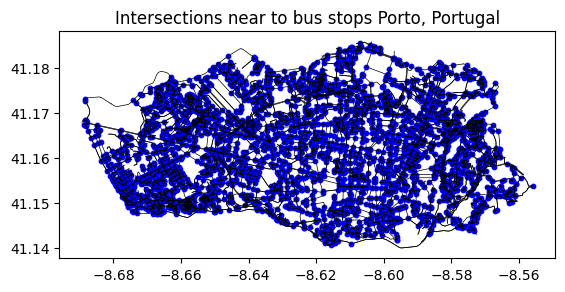

In [27]:
# Plot ONLY edges
fig, ax = plt.subplots()
for _, edge in ox.graph_to_gdfs(G, nodes=False, edges=True).iterrows():
    line = edge.geometry
    x, y = line.xy
    ax.plot(x, y, color="black", linewidth=0.5)

# Plot bus_stop_intersections
near_bus_stop_intersections.plot(ax=ax, color='blue', markersize=10)

ax.set_title("Intersections near to bus stops {}".format(place_name))
plt.show()


In [28]:
# Large number, hard to analize, let's look into neighbourhoods

In [41]:
place_name = "Paranhos, Porto,Portugal"

In [42]:
tags = {'highway': 'bus_stop'}
bus_stops = ox.geometries_from_place(place_name, tags=tags)

<ipython-input-42-70b09b3fff53>:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bus_stops = ox.geometries_from_place(place_name, tags=tags)


175


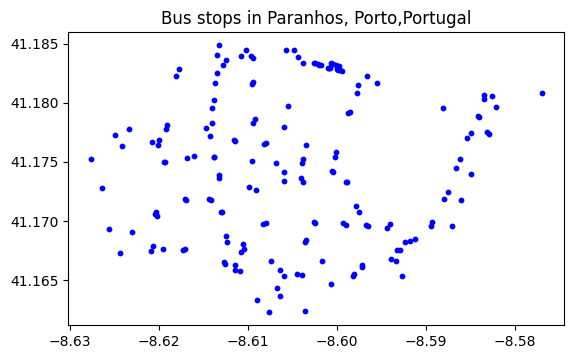

In [43]:
#Bus stops in Paranhos
fig, ax = plt.subplots()
bus_stops.plot(ax=ax, color='blue', markersize=10)
print(len(bus_stops))
ax.set_title("Bus stops in {}".format(place_name_n))
plt.show()


In [47]:
G = ox.graph_from_place(place_name, network_type = 'drive')
intersections = ox.graph_to_gdfs(G, nodes=True, edges=False)
filtered_intersections = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree > 2])]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


760


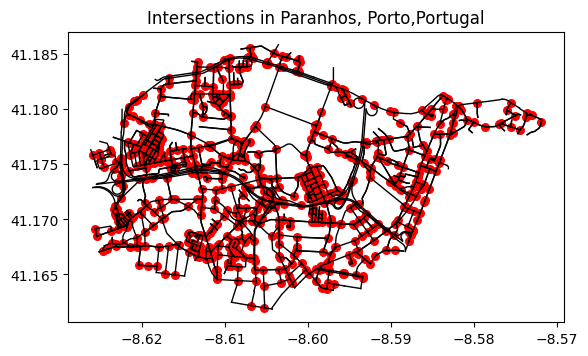

In [49]:
fig, ax = plt.subplots()
for _, edge in ox.graph_to_gdfs(G, nodes=False, edges=True).iterrows():
    line = edge.geometry
    x, y = line.xy
    ax.plot(x, y, color="black", linewidth=1)
print(len(filtered_intersections))
filtered_intersections.plot(ax=ax, color='red', markersize=30)
ax.set_title("Intersections in {}".format(place_name))
plt.show()

In [50]:
near_bus_stop_intersections = filtered_intersections[filtered_intersections.apply(lambda x: is_near_bus_stop(x, bus_stops), axis=1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


760


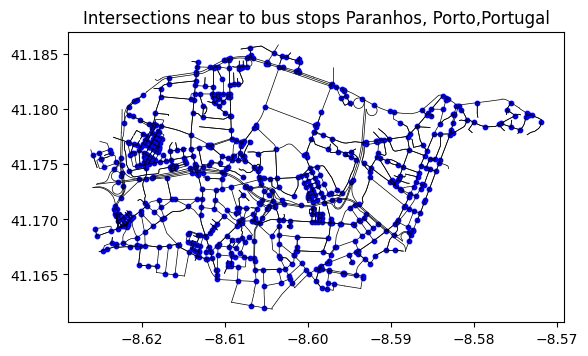

In [52]:
# Plot ONLY edges
fig, ax = plt.subplots()
for _, edge in ox.graph_to_gdfs(G, nodes=False, edges=True).iterrows():
    line = edge.geometry
    x, y = line.xy
    ax.plot(x, y, color="black", linewidth=0.5)

# Plot bus_stop_intersections
near_bus_stop_intersections.plot(ax=ax, color='blue', markersize=10)
print(len(near_bus_stop_intersections))
ax.set_title("Intersections near to bus stops {}".format(place_name))
plt.show()

In [53]:
#Nothing changed up there, probably something went wrong

In [56]:
bus_stops_buffer = bus_stops.to_crs('EPSG:3395').buffer(100).to_crs('EPSG:4326')

In [57]:
near_bus_stops = intersections[intersections.geometry.apply(lambda x: bus_stops_buffer.contains(x).any())]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


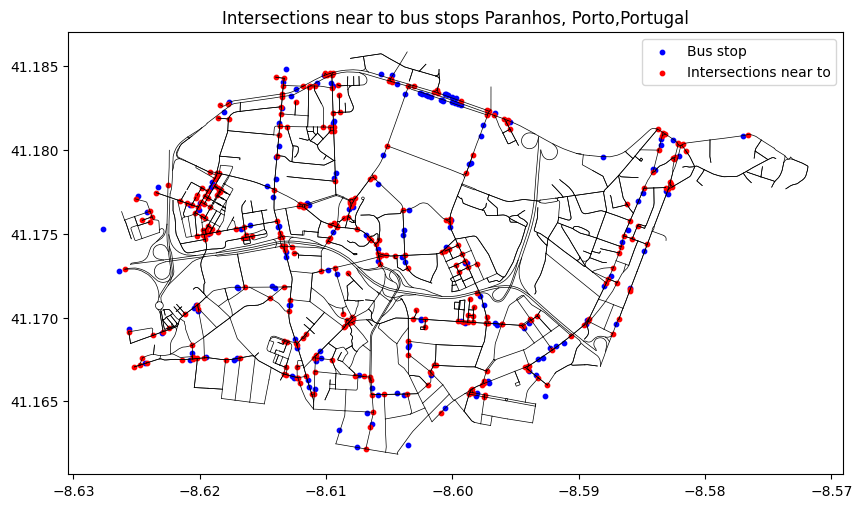

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

for _, edge in ox.graph_to_gdfs(G, nodes=False, edges=True).iterrows():
    line = edge.geometry
    x, y = line.xy
    ax.plot(x, y, color="black", linewidth=0.5)

bus_stops.plot(ax=ax, color='blue', markersize=10, label='Bus stop')

near_bus_stops.plot(ax=ax, color='red', markersize=10, label='Intersections near to')

ax.set_title("Intersections near to bus stops {}".format(place_name))
plt.legend()
plt.show()